![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [2]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [3]:
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE
328,46.8,14.3,215.0,4850.0,FEMALE
329,50.4,15.7,222.0,5750.0,MALE
330,45.2,14.8,212.0,5200.0,FEMALE


In [2]:
penguins_df.info()
penguins_df['sex']=penguins_df['sex'].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [3]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   culmen_length_mm   332 non-null    float64 
 1   culmen_depth_mm    332 non-null    float64 
 2   flipper_length_mm  332 non-null    float64 
 3   body_mass_g        332 non-null    float64 
 4   sex                332 non-null    category
dtypes: category(1), float64(4)
memory usage: 10.9 KB


In [37]:
df=pd.get_dummies(penguins_df,drop_first=True)
df_scale=StandardScaler().fit_transform(df)

In [38]:
inertias=[]
for k in np.arange(1,11,1):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_scale)
    labels=kmeans.predict(df_scale)
    inertias.append(kmeans.inertia_)
for i, val in zip(np.arange(1,11,1),inertias):
    print(i,val)

1 1659.9999999999995
2 881.8305702961084
3 576.2691239087537
4 383.46432033536416
5 282.84171477880295
6 215.9510467634977
7 199.45104663200084
8 183.49374599050432
9 171.03459736869075
10 163.19248263500583


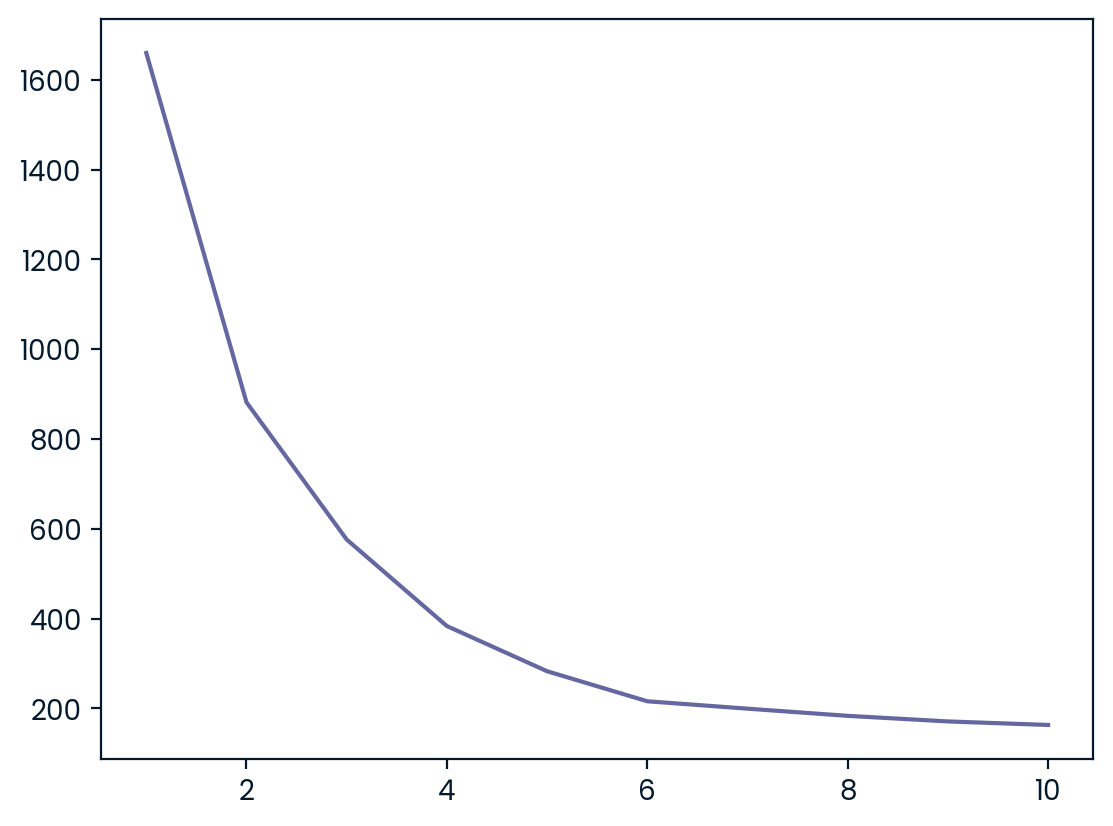

In [39]:
plt.plot(np.arange(1,11,1),inertias)
plt.show()

In [40]:
    kmeans=KMeans(n_clusters=6)
    kmeans.fit(df_scale)
    labels=kmeans.predict(df_scale)
    penguins_df['cluster']=labels
    penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   culmen_length_mm   332 non-null    float64 
 1   culmen_depth_mm    332 non-null    float64 
 2   flipper_length_mm  332 non-null    float64 
 3   body_mass_g        332 non-null    float64 
 4   sex                332 non-null    category
 5   cluster            332 non-null    int32   
dtypes: category(1), float64(4), int32(1)
memory usage: 12.2 KB


In [41]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,MALE,1
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
3,36.7,19.3,193.0,3450.0,FEMALE,2
4,39.3,20.6,190.0,3650.0,MALE,1


In [42]:
stat_penguins=penguins_df.groupby("cluster").mean()
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               45.563793        14.237931         212.706897  4679.741379
1               40.260870        19.026087         191.985507  4035.144928
2               37.580769        17.575641         187.666667  3363.141026
3               49.473770        15.718033         221.540984  5484.836066
4               50.624324        19.270270         199.945946  3953.378378
5               47.310345        17.706897         192.758621  3569.827586
